# **Characteristics of a CCD**

# **PROCEDURE: PART 2**


## **Load Python modules/packages**

Run the following cell to load all the Python 3 modules and packages needed for this lab. In this introductory lab, we do not expect you to understand the steps involved in importing packages. If interested, you may refer to the extensive documentation related to Python 3 available online. 

To run (=execute) a cell, press the *SHIFT* and *ENTER* keys simultaneously on the keyboard. This works for both Markdown and Code cells.

============================= test session starts ==============================
platform linux -- Python 3.6.4, pytest-3.5.0, py-1.5.3, pluggy-0.6.0

Running tests with photutils version 0.5.
Running tests in .local/lib/python3.6/site-packages/photutils.

Date: 2018-10-16T01:58:41

Platform: Linux-4.4.128-1.el7.elrepo.x86_64-x86_64-with-debian-9.4

Executable: /opt/conda/bin/python

Full Python Version: 
3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 18:10:19) 
[GCC 7.2.0]

encodings: sys: utf-8, locale: UTF-8, filesystem: utf-8
byteorder: little
float info: dig: 15, mant_dig: 15

Numpy: 1.12.1
Scipy: 1.0.1
Matplotlib: 2.2.2
Cython: 0.25.2
Astropy: 3.0.1
scikit-image: 0.12.3
scikit-learn: 0.19.1
Using Astropy options: remote_data: none.

rootdir: /home/mvolab66, inifile:
plugins: remotedata-0.2.0, openfiles-0.2.0, doctestplus-0.1.2, arraydiff-0.2
collected 1164 items

.local/lib/python3.6/site-packages/photutils/aperture/tests/test_aperture_photometry.py . [  0%]
......................

0

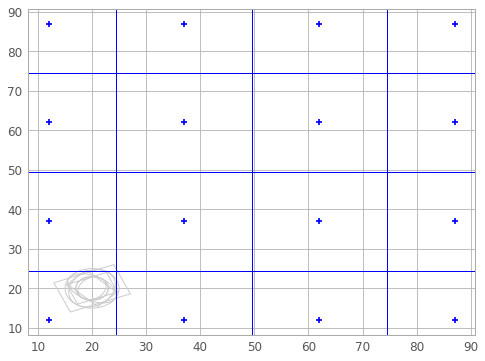

In [4]:
## Import all the needed packeages
import os
from astropy import *
import numpy as np
import astropy.io.fits as pyfits
import photutils
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
import urllib, zipfile, tarfile
from urllib.request import urlretrieve
plt.style.use(astropy_mpl_style)

## uncomment and run the following command once to test photutils
photutils.test()

## **Load all the data**

The following cell retrieves all the data needed for this lab from the web. Just run the cell without any changes.

We first check if a Data directory exists in your Home/ directory, else we create it. Then the lab data is downloaded as a compressed (tarball) file and is saved in that directory. Finally, the tarball is uncompressed into individual files which you will use in this exercise. After you execute the following cell, go to the Data directory and check to make sure you have all the needed files (your TA will guide you in doing this).

In [7]:
## IMPORTANT!!
## RUN THIS STEP ONLY ONCE FOR YOUR CCD LAB TO OBTAIN AND SAVE ALL THE RAW DATA
## >>>>>>>> ONCE YOU HAVE THE DATA, NO NEED TO RE-RUN THIS STEP <<<<<<<<<<<<

# retrieve the data as a tarball from the UVic website, and untar in home dir
Lab1_datadir = 'CCDLab_data'

# Check if data dir exists, else retrieve data from UVic website
if not(os.path.exists(Lab1_datadir) and os.path.isdir(Lab1_datadir)):
    url = 'http://astrowww.phys.uvic.ca/~karun/UVicAstrLabs/A250/CCDlab/'
    tgz = Lab1_datadir+'.tgz'
    outfile = tgz
    urlretrieve(url+tgz, filename=outfile)
    tar = tarfile.open(outfile)
    tar.extractall()
    tar.close()

print('CCD Lab data dir: ',Lab1_datadir)
print('List of available files:')
file_list = os.listdir(Lab1_datadir)
for file in file_list:
    print(file)

CCD Lab data dir:  CCDLab_data
List of available files:
56076p.fits
56070o.fits
56071o.fits
56077p.fits
56074p.fits
56072o.fits
56078p.fits
56068o.fits
56073o.fits
56075p.fits
Sample1p.fits
Dark.fits
56069o.fits
56078o.fits
Flat.fits
56074o.fits
56072p.fits
56068p.fits
Bias.fits
56073p.fits
56075o.fits
Sample1o.fits
56069p.fits
Sample2o.fits
56076o.fits
56070p.fits
Flat_norm.fits
56071p.fits
56077o.fits


## **Here is where the lab exercise begins**

## **Step 0: Prep files**

**Accessing the data (images) and getting basic info** 

Let us first get familiar with accessing the data files (= images from the telescope) and getting some basic information. On a sheet of paper, write down the names of all the data files in the data directory, _Data/CCDlab_

**NOTES** 
1. The unprocessed images (_raw_) are named 560??o.fits. 
2. Bias.fits is the _Bias_ image.
3. Flat.fits is the _Flat Field_ image.
4. Dark.fits is the _Dark_ image. 

These are the images you will work with.
The next cell loads a sample file, 'Sample1o.fits', and gets some basic info regarding the image. 

In [9]:
Lab1_datadir = 'CCDLab_data'
fits_filename = 'Sample1o.fits'
# create a path to the fits file
infits = os.path.join(Lab1_datadir,fits_filename)
# get and print out basic info regarding the fits file
pyfits.info(infits)

Filename: CCDLab_data/Sample1o.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      30   (384, 576)   float32   


**Exercise 1**
In the following cell, replace the sample filename with one of the other filenames in your list, and run it. Do you get similar info regarding the image? 

In [10]:
# Try different filenames from your list and re-run this cell
fits_filename = '56068o.fits'
infits = os.path.join(Lab1_datadir,fits_filename)
pyfits.info(infits)

Filename: CCDLab_data/56068o.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      35   (384, 576)   float32   


Next, we will learn to access the _fits header_ information which contains important information such as the size of the image, exposure time, etc.

In [11]:
print('Filename       X-size  Y-size  Exp Time[s]')
fits_filename = '56077o.fits'
infits = os.path.join(Lab1_datadir,fits_filename)
image_header = pyfits.getheader(infits, ext=0) ## this header info is needed for later
naxis1 = image_header['NAXIS1'] ## GETS THE X-DIMENSION OF THE IMAGE
naxis2 = image_header['NAXIS2'] ## GETS THE Y-DIMENSION
etime = image_header['INTTIME'] ## GETS THE EXPOSURE TIME FROM THE HEADER
print('%s %5d %7d %9.1f' % (fits_filename,naxis1,naxis2,etime))

Filename       X-size  Y-size  Exp Time[s]
56077o.fits   384     576      26.0


**Exercise 2**
In the following cell, create a list of filenames for the raw images, and get the x, y sizes and exposure times. The first line creates a list. Fill in the rest of the code. 

In [12]:
filename_list = []
for file_num in range(68,79):
    filename_list.append('560'+str(file_num)+'o.fits')

## NOTE: The same can be achieved in a more elegant form using the following single line of code
## filename_list = ['560'+str(file_num)+'o.fits' for file_num in range(68,79)]

## Use the file list to get the X, Y sizes and the exposure times for all the images
## from their fits headers
print('Filename       X-size  Y-size  Exp Time[s]')
for fits_filename in filename_list:

    ## FILL IN THE REQUIRED CODE HERE TO GET X,Y SIZES AND EXPOSURE TIME
    infits = os.path.join(Lab1_datadir,fits_filename)
    image_header = pyfits.getheader(infits, ext=0) ## this header info is needed for later
    naxis1 = image_header['NAXIS1'] ## GETS THE X-DIMENSION OF THE IMAGE
    naxis2 = image_header['NAXIS2'] ## GETS THE Y-DIMENSION
    etime = image_header['INTTIME'] ## GETS THE EXPOSURE TIME FROM THE HEADER

    ## PRINT OUT THE VALUES
    print('%s %7d %7d %9.1f' % (fits_filename,naxis1,naxis2,etime))


Filename       X-size  Y-size  Exp Time[s]
56068o.fits     384     576       0.0
56069o.fits     384     576       0.1
56070o.fits     384     576       0.2
56071o.fits     384     576       0.4
56072o.fits     384     576       0.8
56073o.fits     384     576       1.6
56074o.fits     384     576       3.2
56075o.fits     384     576       6.4
56076o.fits     384     576      13.0
56077o.fits     384     576      26.0
56078o.fits     384     576      52.0


## **Step 1: Reading in an image** 

Before we can process an image, it has to be read into a numerical array. Then we can carry out arithmetic and statistical operations on it. 

In the first part, we read in an image into a 2D array variable, *image_data*. Then, we get the (x,y) size of the image, and print it out to screen. as well as the mean and standard deviation of the pixel values. First, we estimate the statistics of the whole image, and then, we estiamte the mean and standard deviation of only a sub-region (also called subraster). 

**Exercise 2** Enter one of your filenames on the second line, uncomment it and then re-run this cell. Do you get the same image size?

**NOTE** The first number in the size refers to the number of rows, and the second to the columns (Python is row justified) 

In [13]:
# read the image data into a two-dimensional (x,y) array
fits_filename = 'Sample1o.fits'
## fits_filename = 
infits = os.path.join(Lab1_datadir,fits_filename)

## >>>>>>> IMPORTANT LINE <<<<<<<<<<<<
## THIS READS THE IMAGE INTO AN ARRAY
image_data = pyfits.getdata(infits, ext=0)
#allows us to read the fits image

# get the x,y size of the image
array_size = image_data.shape

print('Name of image: ',infits)
print('Size of array: ',array_size)
print('Number of rows: %d'% (array_size[0])) ## USES FANCY FORMATTING
print('Number of columns: %d' % (array_size[1]))


Name of image:  CCDLab_data/Sample1o.fits
Size of array:  (576, 384)
Number of rows: 576
Number of columns: 384


## **Step 1 (contd.): Processing an image [IMPORTANT STEP]** 

Now that we have the image data in a numerical array, we can do mathematical operations on it. 

Steps to be done:
1. Subtract the *Bias* from each image
2. Divide each image by the *Flat Field*

Your TA will talk to you about what these steps mean. Use the example given and carry out these two steps on all the other images. The bias image and the flat field image are provided to you in Lab1_datadir.

In [14]:
# read in the bias image
bias_image = os.path.join(Lab1_datadir,'Bias.fits')
bias_data = pyfits.getdata(bias_image, ext=0)
# read in the flat field image
ff_image = os.path.join(Lab1_datadir,'Flat_norm.fits')
ff_data = pyfits.getdata(ff_image, ext=0)

## Now process each image
fits_filename = 'Sample1o.fits'
infits = os.path.join(Lab1_datadir,fits_filename)
image_data = pyfits.getdata(infits, ext=0)
image_header = pyfits.getheader(infits, ext=0) ## this header info is needed for later
## subtract the bias
image_data_b = image_data - bias_data
## divide by the flat field
image_data_ff = image_data_b/ff_data

## save the image under a new name
outfits_name = 'Sample1p.fits' ## the 'p' represents 'processed'
outfits = os.path.join(Lab1_datadir,outfits_name)
pyfits.writeto(outfits,image_data_ff,header=image_header,overwrite=True)

## Print out 
print('Processed image: %s' % (fits_filename))
print('Output image: %s' % (outfits))

Processed image: Sample1o.fits
Output image: CCDLab_data/Sample1p.fits


**Exercise 3**

In the code cell below, use another fits_filename from your list, then copy and paste the code to process that image. Run the cell and check if your new fits file has been successfully created.

In [15]:
## Use this code cell to process one of your images
## copy and paste the required code lines from the cell above 

bias_image = os.path.join(Lab1_datadir,'Bias.fits')
bias_data = pyfits.getdata(bias_image, ext=0)
# read in the flat field image
ff_image = os.path.join(Lab1_datadir,'Flat_norm.fits')
ff_data = pyfits.getdata(ff_image, ext=0)

## Now process each image
fits_filename = '56068o.fits'
infits = os.path.join(Lab1_datadir,fits_filename)
image_data = pyfits.getdata(infits, ext=0)
image_header = pyfits.getheader(infits, ext=0) ## this header info is needed for later
## subtract the bias
image_data_b = image_data - bias_data
## divide by the flat field
image_data_ff = image_data_b/ff_data

## save the image under a new name
outfits_name = '56068p.fits' ## the 'p' represents 'processed'
outfits = os.path.join(Lab1_datadir,outfits_name)
pyfits.writeto(outfits,image_data_ff,header=image_header,overwrite=True)

## Print out 
print('Processed image: %s' % (fits_filename))
print('Output image: %s' % (outfits))


## (remember the bias and flat field have already been read in)

Processed image: 56068o.fits
Output image: CCDLab_data/56068p.fits


## **Step 1 (contd.): Processing several images **

Processing one image at a time is tedious >:(
Here is a way of doing several images simultaneously 

**NOTE: This can be done more elegantly using a user-defined function, but that is a more advanced topic.**


In [16]:
## THIS CELL IS JUST A SIMPLE PYTHON TUTORIAL TO SHOW HOW WE CAN GENERATE THE OUTPUT FILENAME
## FROM ANY GIVEN INPUT FILENAME
fits_filename = 'Sample1o.fits'
[file_base,file_end] = fits_filename.split('.')
print(file_base)
file_base = file_base[:-1]+'p'
print(file_base)

Sample1o
Sample1p


In [17]:
## THIS CODE SEGEMENT WILL PROCESS ALL THE IMAGES GIVEN IN THE filename_list 
## WE CREATED THIS LIST A COUPLE OF CELLS BACK
image_list = filename_list
output_list = []
n_images = len(image_list)
print('Number of images to process: %d' % (n_images))
for fits_filename in image_list:
    infits = os.path.join(Lab1_datadir,fits_filename)
    image_data = pyfits.getdata(infits, ext=0)
    image_header = pyfits.getheader(infits, ext=0) ## this header info is needed for later
    ## subtract the bias
    image_data_b = image_data - bias_data
    ## divide by the flat field
    image_data_ff = image_data_b/ff_data

    ## save the image under a new name
    [file_base,file_end] = fits_filename.split('.')
    file_base = file_base[:-1]+'p' ## A bit of string manipulation
    outfits_name = file_base+'.'+file_end ## creates the output filename from the input name
    output_list.append(outfits_name) ## The list of output names is saved for later use
    outfits = os.path.join(Lab1_datadir,outfits_name)
    pyfits.writeto(outfits,image_data_ff,header=image_header,overwrite=True)
    print('Processed image: %s -> %s' % (fits_filename,outfits))
    
## print(output_list)

Number of images to process: 11
Processed image: 56068o.fits -> CCDLab_data/56068p.fits
Processed image: 56069o.fits -> CCDLab_data/56069p.fits
Processed image: 56070o.fits -> CCDLab_data/56070p.fits
Processed image: 56071o.fits -> CCDLab_data/56071p.fits
Processed image: 56072o.fits -> CCDLab_data/56072p.fits
Processed image: 56073o.fits -> CCDLab_data/56073p.fits
Processed image: 56074o.fits -> CCDLab_data/56074p.fits
Processed image: 56075o.fits -> CCDLab_data/56075p.fits
Processed image: 56076o.fits -> CCDLab_data/56076p.fits
Processed image: 56077o.fits -> CCDLab_data/56077p.fits
Processed image: 56078o.fits -> CCDLab_data/56078p.fits


## **Step 2: Find the mean and standard deviation of counts in the processed images **

Next we will do statistics on the processed images. For this we will use only a sub-section of the image (called *image slicing*)

In [18]:
## REMEMBER TO RUN THE PREVIOUS CELL BEFORE RUNNING THIS ONE

## create a list to hold the output stats values
mu_vect = []
sdev_vect = []
etime_vect = []
print('Statistics of a list of images:')

print('Image Name,    ETime,  Mean,   Std Dev')
for pfits_filename in output_list:
    pfits = os.path.join(Lab1_datadir,pfits_filename)
    image_data = pyfits.getdata(pfits, ext=0)
    image_header = pyfits.getheader(pfits, ext=0) ## this header info is needed for later
    mu = np.mean(image_data[100:120,100:120]) ## THIS CALCULATES THE MEAN OF A FIXED IMAGE SLICE
    sdev = np.std(image_data[100:120,100:120]) ## THIS CALCULATES THE STANDARD DEVIATION
    etime = image_header['INTTIME'] ## THIS GETS THE EXPOSURE TIME FROM THE HEADER
    print('%s %5.2f %8.3f %8.3f' % (pfits_filename,etime,mu,sdev))
    mu_vect.append(float(mu))
    sdev_vect.append(float(sdev))
    etime_vect.append(float(etime))

Statistics of a list of images:
Image Name,    ETime,  Mean,   Std Dev
56068p.fits  0.00    2.899    1.701
56069p.fits  0.10    7.006    2.012
56070p.fits  0.20   10.584    1.868
56071p.fits  0.40   17.612    2.116
56072p.fits  0.80   32.237    1.971
56073p.fits  1.60   60.501    2.530
56074p.fits  3.20  117.926    3.136
56075p.fits  6.40  233.554    3.987
56076p.fits 13.00  467.349    5.165
56077p.fits 26.00  926.806    8.072
56078p.fits 52.00 1842.418   12.403


## **Question 1:**

Based on the values you determined in the previous step, do the values agree with what you would expect for a Poissonian distribution? Explain.

Poissonian distribution would be evident if the standard deviation was the square root of the mean value. We see for this set of data that it is not the case. When the average of events, N, is large, the signal to noise ratio is also large. 

## **Step 3: Test the linearity of the CCD**

We will plot the mean number of counts (y-axis) versus the exposure time (x-axis). We will use a log-log plot for this.


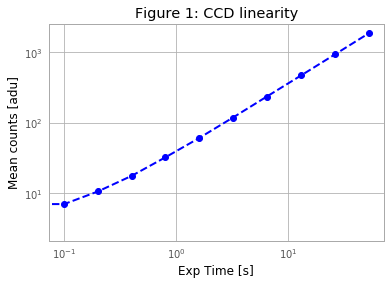

In [40]:
plt.figure()
plt.title('Figure 1: CCD linearity')
plt.xlabel('Exp Time [s]')
plt.ylabel('Mean counts [adu]')

## THIS CREATES A SIMPLE SCATTER PLOT
## plt.scatter(etime_vect,mu_vect) 

## THIS CREATES A LOG-LOG PLOT
plt.loglog(etime_vect,mu_vect,'bo--', linewidth=2, markersize=6) 

## NOTE THE LINEAR SECTION AND WHERE THAT LINEAR SECTION BREAKS DOWN 
## DISCUSS YOUR REASONS IN THE CELL BELOW


## **Question 2:**

Is the graph linear? Where and why does this linearity break down? What is the slope of this line? What does the slope tell you?

The graphs appears linear at larger exposures, however at low exposure time, the linearity is inconsistent. The slope represents S, or the number of electrons per second. Where non-linearity occurs, we can expect pixel saturation and charge overflow. In the case of our CCD, the nonlinearity occurs at lower exposure times, which may be corrected for as it is likely related to instances of lower illumination. [7]

## **Step 3a: Determine the gain of the CCD**

**NOTE: THIS IS GIVEN AS STEP 7 IN YOUR LAB MANUAL**

We will plot the mean number of counts (x-axis) versus the variance (y-axis). Refer to the equations given under Step 7 in the lab manual. After plotting, use the linear part to find the gain (images with longer exposure times).

Gain value: 12.19


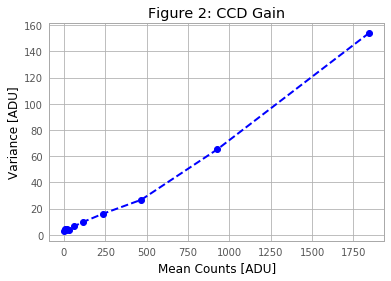

In [20]:
variance = np.multiply(sdev_vect,sdev_vect)

plt.figure()
plt.title('Figure 2: CCD Gain')
plt.xlabel('Mean Counts [ADU]')
plt.ylabel('Variance [ADU]')
plt.plot(mu_vect,variance,'bo--', linewidth=2, markersize=6) 

## Calculate the gain using 'rise over run'
## IMPORTANT: We are using only the last three data points (high S/N points)
SLOPE = (variance[-1]-variance[0])/(mu_vect[-1]-mu_vect[0])
GAIN_VALUE = 1./SLOPE
print('Gain value: %.2f' % GAIN_VALUE)

Gain value [FIT]: 12.57


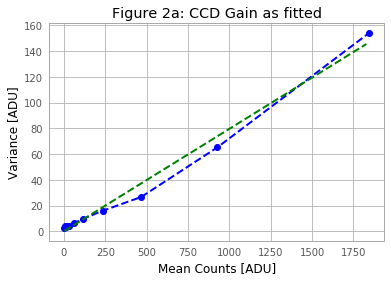

In [37]:
## We will also do a linear fit to the data to determine the gain
(SLOPE_FIT,INTERCEPT) = np.polyfit(mu_vect,variance,1)
GAIN_VALUE_FIT = 1./SLOPE_FIT
print('Gain value [FIT]: %.2f' % GAIN_VALUE_FIT)

## Also replot the CCD Gain plot with the fit overplotted
plt.figure()
plt.title('Figure 2a: CCD Gain as fitted')
plt.xlabel('Mean Counts [ADU]')
plt.ylabel('Variance [ADU]')
plt.plot(mu_vect,variance,'bo--', linewidth=2, markersize=6) 

## Use the fitted parameters to generate the fitted line
mu_gen = np.arange(mu_vect[0],mu_vect[-1],25)
var_gen = np.multiply(SLOPE_FIT,mu_gen) + INTERCEPT
plt.plot(mu_gen,var_gen,'g--', linewidth=2, markersize=6) 


## **Step 4: Examine the noise**

First convert the mean and standard deviation from counts to electrons by multiplying by the _gain_. Then plot the _signal_ (N_e), versus the _noise_ (S_e). Use a log-log plot.

**NOTE** 
1. Here we are using S_e to refer to the noise, $\sigma$_e in Equation 5.4
2. You have to complete the cells above and Figure 2 in order to determine the value of _gain_.



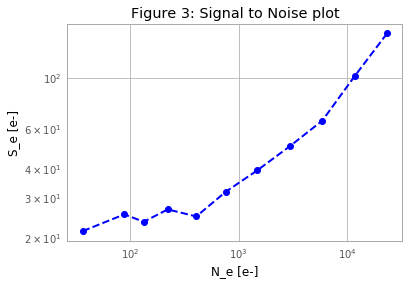

In [35]:
## ENTER THE CORRECT VALUE OF GAIN IN THE LINE BELOW BEFORE RUNNING THIS CELL
GAIN_VALUE = 12.57

N_e = np.multiply(mu_vect, GAIN_VALUE) ## THIS IS THE SIGNAL
S_e = np.multiply(sdev_vect, GAIN_VALUE) ## THIS IS THE NOISE

## create a log-log plot of signal, N_e versus noise, S_e. 
## Use the template given above for creating this plot
## Use the proper axis labels and title

plt.figure()
plt.title('Figure 3: Signal to Noise plot')
plt.xlabel('N_e [e-]')
plt.ylabel('S_e [e-]')

## THIS CREATES A SIMPLE SCATTER PLOT
## plt.scatter(etime_vect,mu_vect) 

## THIS CREATES A LOG-LOG PLOT
plt.loglog(N_e,S_e,'bo--', linewidth=2, markersize=6) 



## **Question 3:**

**NOTE** YOU HAVE TO COMPLETE THE PLOT IN THE PREVIOUS CELL BEFORE YOU CAN ANSWER THIS QUESTION!

What value did you use for the gain? What are your values for N_e and S_e? (use a print statement in the cell below to print out these values neatly)


In [23]:
print('Gain value [FIT]: %.2f' % GAIN_VALUE_FIT)
print('N_e values:')
print(N_e)
print('S_e values:')
print(S_e)


Gain value [FIT]: 12.57
N_e values:
[    35.32389593     85.38698112    128.98807947    214.63392383
    392.8714411     737.31461723   1437.15200151   2846.28963774
   5695.51441481  11294.84388202  22453.27891119]
S_e values:
[  20.72889132   24.52504324   22.76958657   25.7874737    24.0203192
   30.82910643   38.21419357   48.59083174   62.95013487   98.36858974
  151.15436464]


In [18]:
## USE A FOR LOOP TO PRINT OUT EACH VALUE OF N_e AND S_e SIDE BY SIDE
## USE A FORMATTED PRINT STATEMENT (SEE CODE STATEMENTS ABOVE)

In the Signal-to-Noise, plot we notice two regimes, a flat section which is noise dominated, and a linear section which is signal dominated. Let us study what these sections represent.

In this log-log plot, Figure 3, the relation between N_e and S_e in these two regions appears to be linear. Therefore, let us fit a straight line through the points in each region. 

**HINT** Refer to Equation 5.4 in the lab manual. Assume that the dark current is negligible.

In [41]:
## We will do a linear fit in the noise dominated (low signal) region
mu_lowSN = np.log10(N_e[0:4])
sdev_lowSN = np.log10(S_e[0:4])
(SLOPE_FIT_lowSN,INTERCEPT_lowSN) = np.polyfit(mu_lowSN,sdev_lowSN,1)
print('Slope and intercept of low SN region: %.2f %.2f' % (SLOPE_FIT_lowSN,INTERCEPT_lowSN))

## We will do a linear fit in the signal dominated region (high signal)
mu_highSN = np.log10(N_e[4:-1])
sdev_highSN = np.log10(S_e[4:-1])
(SLOPE_FIT_highSN,INTERCEPT_highSN) = np.polyfit(mu_highSN,sdev_highSN,1)
print('Slope and intercept of high SN region: %.2f %.2f' % (SLOPE_FIT_highSN,INTERCEPT_highSN))


Slope and intercept of low SN region: 0.11 1.17
Slope and intercept of high SN region: 0.40 0.34


## **Question 4:**

What is the log-log plot of N_e versus S_e showing, qualitatively? (i.e. , exposure time?) 
 
The graph represents a signal-to-noise graph; with greater signal, the noise also increases, however between the range of 100 and 1000 noise input, the noise oscillates slightly. 

**ESTIMATE THE READ NOISE**
Assuming that the _dark current_ is negligible, use this graph and Equation (4.4) in your lab manual to estimate the read noise. Explain your reasoning.

Read noise = 2.11

## **Step 5: Examine the relative noise (i.e. the S/N in Equation 5.5)**

**Calculate the Signal to Noise ratio, SNR** (given as S/N in Equation 5.5, and N/S in Step 5 in your manual)



[   1.70408998    3.48162408    5.66492848    8.32318537   16.35579602
   23.91618515   37.60780661   58.57668074   90.47660385  114.82165101
  148.54535603]
[    35.32389593     85.38698112    128.98807947    214.63392383
    392.8714411     737.31461723   1437.15200151   2846.28963774
   5695.51441481  11294.84388202  22453.27891119]


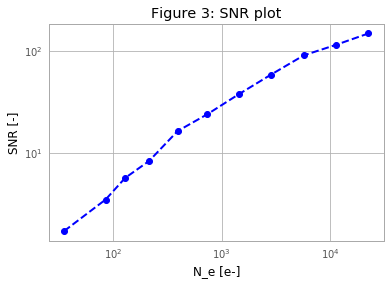

In [26]:
# calculate the signal-to-noise ratio
SNR = N_e/S_e

## Create a log-log plot of SNR versus signal, N_e. 
## Use the template given above for creating this plot
## Use the proper axis labels and title

## THIS CREATES A LOG-LOG PLOT
plt.figure()
plt.title('Figure 3: SNR plot')
plt.xlabel('N_e [e-]')
plt.ylabel('SNR [-]')
plt.loglog(N_e,SNR,'bo--', linewidth=2, markersize=6) 
print(SNR)
print(N_e)

## **Question 5:**

**NOTE** YOU HAVE TO COMPLETE THE PLOT IN THE PREVIOUS CELL BEFORE YOU CAN ANSWER QUESTION 5!

Qualitatively, what is this plot showing? Use a print statement (in the cell below) to print out the corresponding values of SNR and N_e . 

The plot shows the signal-to-noise ratio as photons hit the detector each second vs the noise from various sources. 

**ADDITIONAL QUESTION (1)** How many photons would need to hit the detector in order to get SNR = 100? Show your calculation in the cell below and explain. (HINT: Use the SNR plot and Equation 4.5)
From the plot, we may observe that when SNR = 100, N_e is approximately 11294.8 electrons. 

In [33]:
print('SNR values')
print(SNR) 
print('N_e values')
print(N_e)
## USE A FORMATTED PRINT STATEMENT (SEE CODE STATEMENTS ABOVE)

SNR values
[   1.70408998    3.48162408    5.66492848    8.32318537   16.35579602
   23.91618515   37.60780661   58.57668074   90.47660385  114.82165101
  148.54535603]
N_e values
[    35.32389593     85.38698112    128.98807947    214.63392383
    392.8714411     737.31461723   1437.15200151   2846.28963774
   5695.51441481  11294.84388202  22453.27891119]


## **Step 6: Calculate the theoretical noise**

Calculate the theoretical noise using Equation (4.4) given in your lab manual. Neglect the dark current term, Dt = 0

**NOTE** You have to determine the value of _read noise, R_ using the plot in Figure 3.


In [46]:
## Theoretical noise using Equation 4.4
R=np.sqrt((S_e_theo*S_e_theo)-N_e)

## NOTE: YOU NEED TO ENTER THE CORRECT VALUE OF READ NOISE HERE
print(R)

S_e_theo = np.sqrt(N_e + R*R)

## USE A FOR LOOP TO PRINT OUT EACH VALUE OF S_e_theo AND 
## THE MEASURED NOISE VALUE, S_e SIDE BY SIDE
## USE A FORMATTED PRINT STATEMENT (SEE CODE STATEMENTS ABOVE)
print(S_e_theo)
print(S_e)

[ 2.11  2.11  2.11  2.11  2.11  2.11  2.11  2.11  2.11  2.11  2.11]
[   6.39425963    9.61891846   11.7258467    15.02777345   20.24043388
   27.65768265   38.55887999   54.22386221   76.6748315   107.9555396
  152.19608241]
[  21.38059419   25.29609466   23.48544757   26.59821511   24.77550241
   31.79835349   39.41562297   50.1184959    64.92924618  101.46123425
  155.90655959]


## **Question 6:**

Print out the theoretical noise values, S_e_theo, and the corresponding measured noise values, S_e,  in the code cell above. How do they compare to the measured values? Is there a trend with exposure time? What does this discrepancy imply? Do you think including dark current would make a difference?


At lower exposure times, there is a much more significant deviation in the actual values when compared to the expected/theoretical values. As the values tend towards higher exposure times, the deviation, while still being present, is not as significant. At the earliest exposure, the expected value is 6.31, however the actual read noise value is 20.7, which is almost 3 times as large. This implies that a combination of noise factors, such as the relatively low sensitivity, and high read noise of the device itself causes a more dominating read noise at lower exposures. The read noise limits the signal-to-noise ratio, which is generally desired to be high (implying there is little discrepancy and so the signal outweighs the noise). Dark current affects the CCD whether or not it is beinge exposed to light, and therefore the exposure time will not matter. The effects of dark current can be reduced by cooling the CCD. 

## **Step 7: Verify the gain of the detector**

**NOTE: WE HAVE ALREADY COMPLETED THIS SECTION, SO THERE IS NO NEED TO DO THIS AGAIN**


## **Question 7:**

Based on all your results so far, is this a Poissonian distribution? Explain

Based on the calculated values of the S_e_theo and S_e, the values of S_e_theo does not appear to be the square root of the S_e vlaue, which implies it is not Poissonian distribution. Poissonian distribution occurs when photons arrive at random on the surface of the detector, and the Poissonian distribution gives the probability of the photon's arrival at the detector as a function of time. If there were no other contributions of noise, the noise $\sigma$ would be given by the square root of the number of electrons. Evidently, there are additional and more significant sources of noise in this device.

## **Question 8:**

**NOTE** YOU HAVE TO COMPLETE THE PLOTS IN THE PREVIOUS CELLS BEFORE YOU CAN ANSWER QUESTION 8!

What value do you calculate for the gain? Does this agree with what you expect? Discuss.

The calculated value for the gain from the plot is 12.19 e-/ADU. Given that the gain can be obtained by taking the number of electrons N_e and dividing it by the number of counts for that exposure time, we can take a few measurements of the expected gain, for example, for the 52 s exposure: the ADU value is 2714, and the N_e is 22453, so the gain = 22453/2714 = 8.27. Similarily for the 26 s exposure; g = 11294/1360 = 8.31. We can therefore say that the expected gain is around 8.3. A greater value for the gain implies a greater ratio of the analog charge measurement over the assigned data number. In this case, the calculated value of the gain exceeds the expected value; this indicates that the amount of photons quantized into electrons was greater than expected over the number of counts. [8]



# **ADDITIONAL QUESTIONS**

Answer the three additional questions in code cells below (INSERT NEW CODE CELLS AS NEEDED) or on a separate sheet of paper and submit it along with the marking rubric for marking.


In [58]:
print('1.   We want to obtain S/N = 100 in our observations. How many electrons do we need to collect for this S/N?')
print('let N_e equal x')
print('Rearranging equation 4.5, we let SNR=100, and R=2.11, and neglect Dt:')
print('(x^2-10422x+44521)')
print('x=10417.726 electrons are needed for an S/N ratio of 100.')

1.   We want to obtain S/N = 100 in our observations. How many electrons do we need to collect for this S/N?
let N_e equal x
Rearranging equation 4.5, we let SNR=100, and R=2.11, and neglect Dt:
(x^2-10422x+44521)
x=10417.726 electrons are needed for an S/N ratio of 100.
